In [31]:
import pandas as pd

In [32]:
lessor_name_df = pd.read_csv("results/lessor_name_experiment10.csv")
effective_date_df = pd.read_csv("results/effective_date_experiment10.csv")
commencement_date_df = pd.read_csv("results/commencement_date_experiment10.csv")
end_date_df = pd.read_csv("results/end_date_experiment10.csv")
option_to_purchase_df = pd.read_csv("results/option_to_purchase_experiment10.csv")
option_to_extend_df = pd.read_csv("results/option_to_extend_experiment10.csv")
option_to_terminate_df = pd.read_csv("results/option_to_terminate_experiment10.csv")
option_to_terminate_lessor_df = pd.read_csv(
    "results/option_to_terminate_lessor_experiment10.csv"
)

In [33]:
lessor_name_df.head()

,Lease,Answer,Real answer,Correct
0,1,Kyle J. Beller,"BarBell Real Estate, LLC",0
1,2,Augmedix Bangladesh Ltd.,Sony Chocolate Industries Ltd,0
2,3,The name of the lessor in the agreement is Lic...,The Wheelership LLC,0
3,4,"Venable Tenant, LLC","Venable Tenant, LLC",1
4,5,Marathon Business,Wyomissing Professional Center III Limited Par...,0


In [34]:
# Create a new dataframe with the "Lease" column from lessor_name_df
new_df = lessor_name_df[['Lease', 'Correct']].copy()

# Merge the "correct" column from each dataframe into new_df
new_df = new_df.merge(effective_date_df[['Lease', 'Correct']], on='Lease', how='left', suffixes=('', '_effective_date'))
new_df = new_df.merge(commencement_date_df[['Lease', 'Correct']], on='Lease', how='left', suffixes=('', '_commencement_date'))
new_df = new_df.merge(end_date_df[['Lease', 'Correct']], on='Lease', how='left', suffixes=('', '_end_date'))
new_df = new_df.merge(option_to_purchase_df[['Lease', 'Correct']], on='Lease', how='left', suffixes=('', '_option_to_purchase'))
new_df = new_df.merge(option_to_extend_df[['Lease', 'Correct']], on='Lease', how='left', suffixes=('', '_option_to_extend'))
new_df = new_df.merge(option_to_terminate_df[['Lease', 'Correct']], on='Lease', how='left', suffixes=('', '_option_to_terminate'))
new_df = new_df.merge(option_to_terminate_lessor_df[['Lease', 'Correct']], on='Lease', how='left', suffixes=('', '_option_to_terminate_lessor'))

# Rename the merged columns to match the desired format
new_df.rename(columns={
  'Correct': 'lessor_name_correct',
  'Correct_effective_date': 'effective_date_correct',
  'Correct_commencement_date': 'commencement_date_correct',
  'Correct_end_date': 'end_date_correct',
  'Correct_option_to_purchase': 'option_to_purchase_correct',
  'Correct_option_to_extend': 'option_to_extend_correct',
  'Correct_option_to_terminate': 'option_to_terminate_correct',
  'Correct_option_to_terminate_lessor': 'option_to_terminate_lessor_correct'
}, inplace=True)

new_df.head()

,Lease,lessor_name_correct,effective_date_correct,commencement_date_correct,end_date_correct,option_to_purchase_correct,option_to_extend_correct,option_to_terminate_correct,option_to_terminate_lessor_correct
0,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,2,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,3,0,0.0,NaN,NaN,1.0,1.0,1.0,1.0
3,4,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [35]:
# Sum the values of each row into a new column 'total_correct'
new_df["total_correct"] = new_df.iloc[:, 1:].sum(axis=1)

new_df.head()

,Lease,lessor_name_correct,effective_date_correct,commencement_date_correct,end_date_correct,option_to_purchase_correct,option_to_extend_correct,option_to_terminate_correct,option_to_terminate_lessor_correct,total_correct
0,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0
1,2,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0
2,3,0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,4.0
3,4,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0
4,5,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0


In [47]:
limit1 = 0
limit2 = 4
limit3 = 6
limit4 = 8

In [48]:
count_total_correct_1 = (
    (new_df["total_correct"] >= limit1) & (new_df["total_correct"] <= limit2)
).sum()
count_total_correct_2 = (
    (new_df["total_correct"] > limit2) & (new_df["total_correct"] <= limit3)
).sum()
count_total_correct_3 = (
    (new_df["total_correct"] > limit3) & (new_df["total_correct"] <= limit4)
).sum()

print(f"Rows where {limit1} <= total_correct <= {limit2}: {count_total_correct_1}")
print(f"Rows where {limit2} < total_correct <= {limit3}: {count_total_correct_2}")
print(f"Rows where {limit3} < total_correct <= {limit4}: {count_total_correct_3}")

Rows where 0 <= total_correct <= 4: 42
Rows where 4 < total_correct <= 6: 36
Rows where 6 < total_correct <= 8: 22


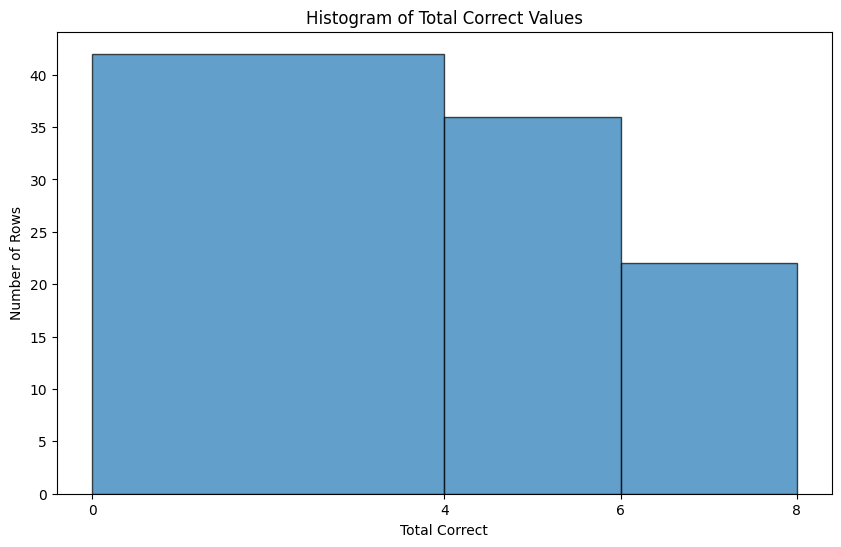

In [49]:
import matplotlib.pyplot as plt

# Data for the histogram
bins = [limit1, limit2, limit3, limit4]
counts = [count_total_correct_1, count_total_correct_2, count_total_correct_3]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, weights=counts, edgecolor="black", alpha=0.7)
plt.xlabel("Total Correct")
plt.ylabel("Number of Rows")
plt.title("Histogram of Total Correct Values")
plt.xticks(bins)
plt.show()

In [43]:
new_df.to_excel("aggregated_results/correct_results.xlsx", index=False)